In [1]:
using Gadfly

Normalizing constant for the exponential: $(-e^{-x_{max}} + 1)^{-1}$

In [2]:
# Proabably a better way to do this.
function prob(x, xmax)
    a = (-exp(-xmax) + 1)^(-1)
    a * exp(-x)
end
prob100(x) = prob(x, 100)
prob10(x) = prob(x, 10)

prob10 (generic function with 1 method)

Sanity check

In [3]:
quadgk(prob10, 0, 10)

(0.9999999999999999,1.8040754046905194e-10)

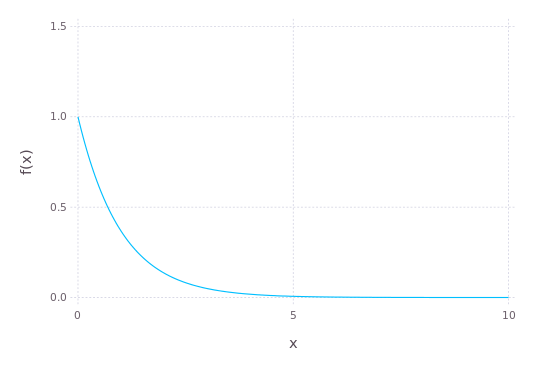

In [4]:
plot(prob10, 0, 10)

In [5]:
# Max value of the distribution.
xmax = 10
# Percent of cells that should have a facility.
ratio = 10^4/10^7
cells = 10^4
numfac = ratio * cells
stepsize = (cells / xmax)

1000.0

In [6]:
# x values to pull probabilities out of the distribution.
distarray = linspace(0, xmax, cells);

In [7]:
# Number of people in a cell if the probability were one.
pers = 1000;
pe = round(Int, [round(pers * prob10(x)) for x in distarray]);

In [8]:
# locations of facilities in cell array.
fac = round(Int, linspace(stepsize / 2, cells, round(Int, numfac)));

In [9]:
# This is basically a moving window.
function totalCost(pe, fac)
    cost = 0
    left = 1
    right = 0
    for i in 1:length(fac)
        if i == length(fac)
            right = length(pe)
        else
            right = round(Int, (fac[i] + fac[i + 1]) / 2)
        end
        for j in left:right
            cost = cost + abs(fac[i] - j) * pe[j] 
        end
        left = right + 1
    end
    cost
end

totalCost (generic function with 1 method)

In [10]:
a = [10,9,8,7,6,5]
# Fac at 9 and 7
b = [2,4]
@assert totalCost(a,b) == 34

In [11]:
function jitterFac(pe, fac)
    newfac = copy(fac)
    for i in 1:length(fac)
        move = rand(-1:1)
        result = fac[i] + move
        if !(result < 1) && !(result > length(pe))
            if i > 1 && result != fac[i - 1]
                newfac[i] = result
            elseif i < length(fac) && result != fac[1 + 1]
                newfac[i] = result
            end
        end
    end
    newfac
end

jitterFac (generic function with 1 method)

In [12]:
function anneal(pe, fac, temp, tstep)
    costs = zeros(convert(Int, ceil(temp / tstep)) + 1)
    cfac = copy(fac)
    ccost = totalCost(pe, cfac)
    i = 1
    while temp > 0
        costs[i] = ccost
        nfac = jitterFac(pe, cfac)
        ncost = totalCost(pe, nfac)
        diff = ccost - ncost
        if diff > 0 
            cfac = nfac
            ccost = ncost
        else
            if exp(diff / temp) > rand()
                cfac = nfac
                ccost = ncost
            end
        end
        temp = temp - tstep
        i = i + 1
    end
    costs
end

anneal (generic function with 1 method)

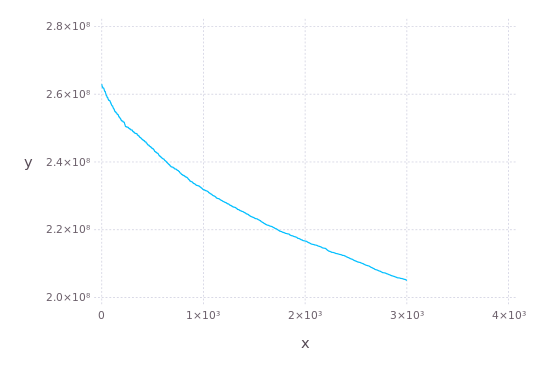

In [41]:
temp = 300
tstep = .1
itr = convert(Int, ceil(temp / tstep)) + 1
cost = anneal(pe, fac, temp, tstep);
plot(x = [x for x = 1:itr], y = cost, Geom.line)

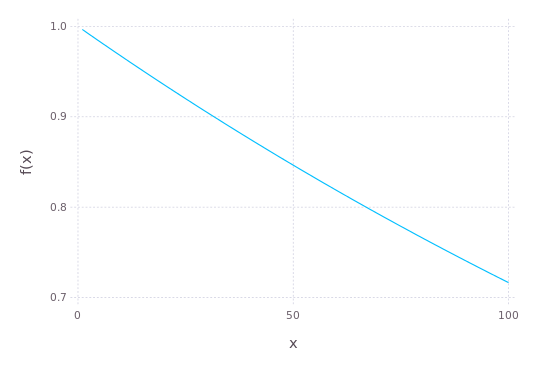

In [42]:
plot(x -> exp(-x/300), 1, 100)